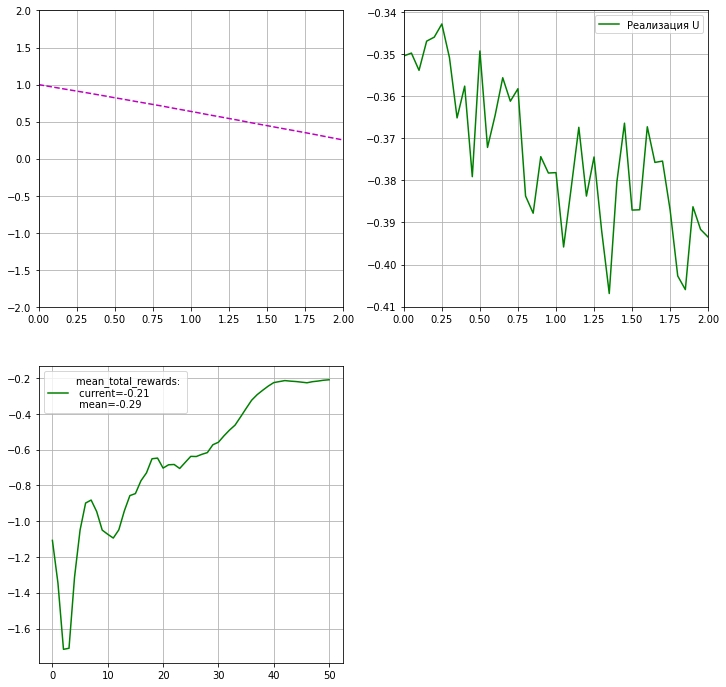

In [27]:
import torch.nn as nn
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.AsynchronousAgentMaker import AsynchronousAgentMaker
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
import Solvers.OneAgentSolver as solver
from Agents.A2C import A2C

env = SimpleControlProblem()

pi_model = SequentialNetwork([env.state_dim, 128, 1])
v_model = SequentialNetwork([env.state_dim, 128, 1])
agent = A2C(env.action_min, env.action_max, pi_model, v_model,
             gamma=1, pi_model_lr=1e-3, v_model_lr=1e-3, entropy_threshold=0.01, action_space_type='continuous')

agent = AsynchronousAgentMaker(agent, inner_agent_n=10)

visualizer = SimpleControlProblemVisualizer(waiting_for_show=10)
solver.go_asynchronously(env, agent, episode_n=51, show=visualizer.show, session_len=2500, session_n=10)